<a href="https://colab.research.google.com/github/camstillo/electrodynamics/blob/master/Copy_of_poisson_with_fenicsx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Finite Element Method

To solve hard electrodynamics problems, we are going to use the finite element method.  This tutorial will help you get familiar with the process.

## Acknowledgements

The installation commands below come from the [FEM on CoLab](https://fem-on-colab.github.io/index.html) project.

This tutorial was adapted from "Solving the Poisson Equation" in [The FEniCSx Tutorial](https://jorgensd.github.io/dolfinx-tutorial/chapter1/fundamentals.html).

Thanks to all of the contributors to these projects!

## FEniCSx, GMSH, and Multiphenicsx

The finite element method involves a lot of numerical methods that would be difficult for us to build from scratch.  Instead, we will draw from a few open-source projects with state-of-the-art implementations.

- [**FEniCSx**](https://fenicsproject.org/) is the workhorse of our finite element calculations.
- [**Gmsh**](https://gmsh.info/) is a library we will use to define the geometry of the systems under study.  It is used in some computer-aided drafting (CAD) applications, too.
- [**Multiphenicsx**](https://github.com/multiphenics/multiphenicsx) is a package built on top of FEniCSx with some nice functions for plotting finite element meshes, scalar functions, and vector fields.

The code in the next three cells will install these three packages within your CoLab session.

The `try ... except` lines below will attempt to import the libraries we need.  If they are not found, they will download and install the libraries.  These commands have been tested on CoLab.  They probably won't work properly elsewhere.

It takes a little while to download and install the libraries, so hit "Play" on the next three cells, relax and grab a cup of coffee, and finish checking your email.  Then get ready to solve some boundary value problems!

In [3]:
try:
    # Import gmsh library for generating meshes.
    import gmsh
except ImportError:
    # If it is not available, install it.  Then import it.
    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh

--2022-10-20 14:58:55--  https://fem-on-colab.github.io/releases/gmsh-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2208 (2.2K) [application/x-sh]
Saving to: ‘/tmp/gmsh-install.sh’

/tmp/gmsh-install.s 100%[===================>]   2.16K  --.-KB/s    in 0s      

2022-10-20 14:58:55 (37.1 MB/s) - ‘/tmp/gmsh-install.sh’ saved [2208/2208]

+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ GMSH_INSTALLED=/usr/local/share/fem-on-colab/gmsh.installed
+ [[ ! -f /usr/local/share/fem-on-colab/gmsh.installed ]]
+ H5PY_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/ac0fe3a/releases/h5py-install.sh
+ [[ https://github.com/fem-on-colab/fem-on-colab.github.io/raw/ac0fe3a/releases/h5py-install.sh == http* ]]
+ H5PY_INSTALL_SCRIPT_DOWNLOAD=http

In [4]:
try:
    # Import FEniCSx libraries for finite element analysis.
    import dolfinx
except ImportError:
    # If they are not found, install them.  Then import them.
    !wget "https://fem-on-colab.github.io/releases/fenicsx-install-real.sh" -O "/tmp/fenicsx-install.sh" && bash "/tmp/fenicsx-install.sh"
    import dolfinx

--2022-10-20 15:00:03--  https://fem-on-colab.github.io/releases/fenicsx-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3055 (3.0K) [application/x-sh]
Saving to: ‘/tmp/fenicsx-install.sh’

/tmp/fenicsx-instal 100%[===================>]   2.98K  --.-KB/s    in 0s      

2022-10-20 15:00:03 (45.1 MB/s) - ‘/tmp/fenicsx-install.sh’ saved [3055/3055]

+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICSX_INSTALLED=/usr/local/share/fem-on-colab/fenicsx.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenicsx.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/f0d2856/releases/pybind11-install.sh
+ [[ https://github.com/fem-on-colab/fem-on-colab.github.io/raw/f0d2856/releases/pybind11-install.sh == http* ]]


In [5]:
try:
    # Import multiphenicsx, mainly for plotting.
    import multiphenicsx
except ImportError:
    # If they are not found, install them.
    !pip3 install "multiphenicsx@git+https://github.com/multiphenics/multiphenicsx.git@8b97b4e"
    import multiphenicsx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/multiphenics/multiphenicsx.git (to revision 8b97b4e) to /tmp/pip-install-hgmnvu8w/multiphenicsx_92d039827a71498cb263fdf11886b6d9
  Running command git clone -q https://github.com/multiphenics/multiphenicsx.git /tmp/pip-install-hgmnvu8w/multiphenicsx_92d039827a71498cb263fdf11886b6d9
  Running command git checkout -q 8b97b4e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for multiphenicsx: filename=multiphenicsx-0.2.dev1-py3-none-any.whl size=42586 sha256=7c854731a2c10ea1d4e6f5ce39637d4c164c0679afa15d8cb0bd0810352930c1
  Stored in directory: /tmp/pip-ephem-wheel-cache-migzistb/wheels/a4/44/a9/e578d5b67de6acd8e975bd56c96ee36944a693ee3d7bc91026
Successfully built multiphenicsx


Everything we need should be installed now!

If you "Restart runtime" from the "Runtime" menu, all of your data will be reset, but the packages will remain installed.

Let's load the packages we need, and get started!

In [6]:
# Everything should be installed now.
# Import the rest of what we need.

import dolfinx.fem
import dolfinx.io
import gmsh
import mpi4py.MPI
import numpy as np
import petsc4py.PETSc
import ufl
import multiphenicsx.fem
import multiphenicsx.io

## Create a Model

We are going to solve the Poisson equation for charged wire inside a grounded, conducting cylinder.  We will assume the cylinder and wire are long enough that we can ignore any variation along the axis of the cylinder and wire, and we focus our attention on a 2D cross section.

Thus, we need a circular disk as our space, and we need to identify the points on the boundary, so we can set them equal to zero.

The Gmsh package will allow us to do this.

Don't just run the following code.  Read through it and try to figure out how it works.

In [7]:
# Define the center of the circle.
x0 = 0
y0 = 0
z0 = 0

# Define the radius of the circle.
r0 = 3

# Tell the modeling program how many dimensions we are using.
dim = 2

# Grid size parameter.  Make it smaller for higher resolution.
delta = 0.2

In [8]:
# Create a model.
gmsh.initialize()
gmsh.model.add("mesh")

In [9]:
# Define points: center of circle and two points on opposite sides.
p0 = gmsh.model.geo.addPoint(x0,y0, z0, delta)
p1 = gmsh.model.geo.addPoint(x0, y0-r0, z0, delta)
p2 = gmsh.model.geo.addPoint(x0, y0+r0,z0, delta)

# Define two semicircular arcs that will be joined into a circle.
c0 = gmsh.model.geo.addCircleArc(p1, p0, p2)
c1 = gmsh.model.geo.addCircleArc(p2, p0, p1)
loop = gmsh.model.geo.addCurveLoop([c0,c1])

## Alternate geometry: semicircle
# l0 = gmsh.model.geo.addLine(p2, p1)
# loop = gmsh.model.geo.addCurveLoop([c0, l0])

disk = gmsh.model.geo.addPlaneSurface([loop])

# Update the model with all of the features we add.
gmsh.model.geo.synchronize()

# Some geometric objects were only used to define others.
# Identify the physical objects.
gmsh.model.addPhysicalGroup(1, [c0,c1], 1)
gmsh.model.addPhysicalGroup(2, [disk], 1)

1

In [10]:
# Create a mesh for this system.
gmsh.model.mesh.generate(dim)

# Bring the mesh into FEniCSx.
mesh, subdomains, boundaries = dolfinx.io.gmshio.model_to_mesh(
    gmsh.model, comm=mpi4py.MPI.COMM_WORLD, rank=0, gdim=2)

# Close the mesh generating program.
gmsh.finalize()

We should have a mesh now: a collection of nodes and elements.  Let's see what we've created.

In [11]:
# Plot the entire mesh.
multiphenicsx.io.plot_mesh(mesh)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [12]:
# Plot the subdomains that FEniCSx has identified.
# There should only be one for this model.
multiphenicsx.io.plot_mesh_tags(subdomains)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [ ]:
# Inspect the boundaries of the elements and the system.
multiphenicsx.io.plot_mesh_tags(boundaries)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Gmsh has just created this model for us.  Describe what you see.

- Did we make the correct shape?
- What kind of "mesh" did Gmsh create?
- Does the mesh seem reasonable?

The shape we created was a flat circle, which is what we wanted because we are taking the 2D cross section of a long cylinder. The mesh is a grid of points laid out in a triangular pattern. The points for the grid are the vertices of these triangles. I'm not certain, but I'm imagining that the triangles are the change in area and they will be combined with the field to determine the solution to poisson's equation. The mesh seems reasonable, from what I can see there look to be around 300 or so triangles. This seems like enough for a circle of this size

## Finite Element Method

We now have a physical system and a grid to work with.  The next step is to define our problem in such a way that FEniCSx can solve it.

The first step is to define a set of functions on our grid.*italicized text*

In [13]:
# Define trial and test functions.
V = dolfinx.fem.FunctionSpace(mesh, ("Lagrange", 2))

### Charge Density

Next, we will define the charge density of the wire.  We use a Gaussian distribution (bell curve) here.

Define the charge density.  We will use a Gaussian charge distribution.  You can adjust the center and the spread of the distribution.

In [14]:
# Set the values: center and spread charge of charge distribution.
xC = 0.3
yC = 0.2
ds = 0.1
Q = 1

# Turn them into symbolic expressions for the FEM solver.
x = ufl.SpatialCoordinate(mesh)
beta = dolfinx.fem.Constant(mesh, petsc4py.PETSc.ScalarType(1/ds))
X0 = dolfinx.fem.Constant(mesh, petsc4py.PETSc.ScalarType(xC))
X1 = dolfinx.fem.Constant(mesh, petsc4py.PETSc.ScalarType(yC))

# Generate the charge density values for our mesh.
rho = Q * ufl.exp(-0.5 * beta**2 * ((x[0]-X0)**2 + (x[1] - X1)**2))

We can plot the charge density.  First, we have to interpolate the symbolic expression onto our grid.

In [15]:
# Interpolate the charge density for plotting.
expr = dolfinx.fem.Expression(rho, V.element.interpolation_points())
charge_density = dolfinx.fem.Function(V)
charge_density.interpolate(expr)

# Now, plot it.
multiphenicsx.io.plot_scalar_field(charge_density, name="Charge Density", warp_factor=10)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

This plot shows a 2D heatmap of the charge.  You can turn it into a 3D surface plot by changing the `warp_factor` above.  Change the `warp_factor` to 10 and replot.  What do you see?

There is a large peak at the point where the charge was declared. This makes sense because the charge density would be an infinite peak at the point of the charge. Since this is a finite model and the charge isn't infinitesimally small, the peak will not be 0. One interesting note is that with the 2D plot if you zoom in, you can still see the outlines of the triangles.

### Prediction

Pause for a moment to make a prediction.  What do you think the potential is going to look like for this system?

Potential is an inverse function which decays as the distance from the charge gets greater and greater. Even though the charge is a point charge, potential will spread out instead of looking like a large peak like we saw in the last graph. I predict that the potential of one side of the circle will be much larger since the charge is slightly offset

### Boundary Condtions

Next, we need to tell the solver about boundary conditions.  This cell identifies the elements on the boundary and sets the value of the potential equal to zero there.

When we set our function equal to a specific value on a boundary, that is called a "Dirichlet boundary condition."

In [16]:
# Identify the domain (all the points inside the boundary).
Omega = subdomains.indices[subdomains.values == 1]

# Identify the boundary.
dOmega = boundaries.indices[boundaries.values == 1]

# Use these objects to tell FEniCSx where the boundary is.
boundary_elements = dolfinx.fem.locate_dofs_topological(V, boundaries.dim, dOmega)

# Now introduce the boundary condition: constant potential on the boundary.
phi0 = 0
Phi0 = dolfinx.fem.Constant(mesh, petsc4py.PETSc.ScalarType(phi0))
bc = dolfinx.fem.dirichletbc(Phi0, boundary_elements, V)

### Explain the Poisson Equation to FEniCSx

The Poisson Equation is $\nabla^2 \phi = -4 \pi \rho$.  When we solve this equation using the finite element method, it looks rather different:
$$ \int dV \, \nabla v \, \cdot \nabla u = \int dV \, 4 \pi \rho \, v$$

$u$ is our "trial function" --- our best approximation to $\phi$.  $v$ is a "test" function.  In some sense, we "test" whether the current approximation $u$ is good by evaluating the integral.

Here, we explain all of this to FEniCSx.

In [17]:
# Define the trial and test functions.
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

# Create a function to store the solution.
phi = dolfinx.fem.Function(V)

# This is the FEM version of the Laplacian.
# It is the left-hand side of Poisson's equation.
a = ufl.inner(ufl.grad(u), ufl.grad(v)) * ufl.dx

# This is how we introduce the charge density.
# It is the right-hand side of Poisson's equation.
L = 4 * ufl.pi * rho * v * ufl.dx

# Put it all together for FEniCSx.
problem = dolfinx.fem.petsc.LinearProblem(a, L, bcs=[bc], u=phi, petsc_options={"ksp_type": "preonly", "pc_type": "lu"})

# Now, solve it!
problem.solve()

# Tie up some loose ends.
phi.vector.ghostUpdate(addv=petsc4py.PETSc.InsertMode.INSERT, mode=petsc4py.PETSc.ScatterMode.FORWARD)

## The Solution

You just solved Poisson's equation using FEniCSx!

In [21]:
# Plot the solution.
multiphenicsx.io.plot_scalar_field(phi, "Potential", 10)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

### Test Your Hypothesis

Inspect the figure above.  Change the warp factor if you would like.

- Was your prediction for the potential correct?  If not, how is the solution generated by FEniCSx different?
- In what ways is the potential similar to the charge distribution?
- In what ways is it different?

When I changed the warp factor around, the potential looked more like I predicted. The peak was a lot less sharp even at the same warp factor, which makes sense. The potential will decrease slower than the charge density will. For a point charge, the charge density would be an infinitely tall peak. A similar shape was acheived with the potential graph, where there was a peak which fell off after a while. The potential was a lot broader at the base due to the fact that it decreases more slowly around the charge. It was different in that it didn't have a very sharp peak like the charge density, and it wasn't nearly as tall.

We can compare the charge distribution and the potential on the same axes by taking a 1D slice through each along the same line.  This is a little complicated, because we have to determine the value of our grid functions at every point along a line.

In [22]:
# Define the set of points that we wish to plot along.
# Avoid hitting the outside of the domain.
buffer = 0.1
num_points = 201

r = np.linspace(-r0 + buffer, r0 - buffer, num_points)
theta = np.arctan(yC/xC)

x = r * np.cos(theta)
y = r * np.sin(theta)

points = np.zeros((3, num_points))
points[0] = x
points[1] = y
v_values = []
rho_values = []

In [23]:
# Interpolate the function values from our mesh onto the line.
# We need a special set of tools.
from dolfinx import geometry

# This is an object that makes searching the mesh faster.
bb_tree = geometry.BoundingBoxTree(mesh, mesh.topology.dim)

# Move through the cells and find the points we need.
cells = []
points_on_proc = []

# Find cells whose bounding-box collide with the the points of our line.
cell_candidates = geometry.compute_collisions(bb_tree, points.T)

# Choose one of the cells that contains the point.
colliding_cells = geometry.compute_colliding_cells(mesh, cell_candidates, points.T)
for i, point in enumerate(points.T):
    if len(colliding_cells.links(i))>0:
        points_on_proc.append(point)
        cells.append(colliding_cells.links(i)[0])

# Evaluate the functions on the cells we found.
points_on_proc = np.array(points_on_proc, dtype=np.float64)
v_values = phi.eval(points_on_proc, cells)
rho_values = charge_density.eval(points_on_proc, cells)

# Scale the two arrays so they fit on the same axes.
scale_factor = rho_values.max() / v_values.max()

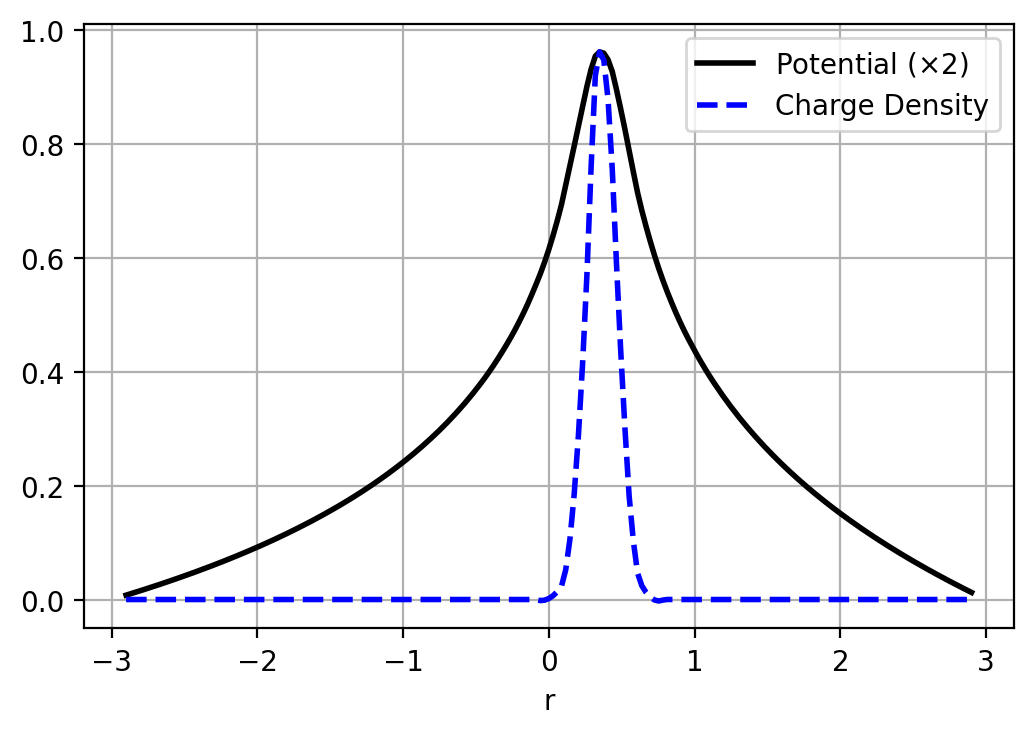

In [24]:
# Make the plot.
import matplotlib.pyplot as plt
fig = plt.figure(dpi=200)
plt.plot(r, scale_factor*v_values, "k", linewidth=2, label="Potential ($\\times %.0f$)" % scale_factor)
plt.plot(r, rho_values, "b--", linewidth = 2, label="Charge Density")
plt.grid(True)
plt.xlabel("r")
plt.legend()

### Electric Field


The electric field is the (negative) gradient of the potential, so we can compute and visualize this, too!

Make another prediction first, though.

What do you expect the electric field to look like?

Since the electric field is based on the rate of change of the potential, I predict it will be greatest near the top of the peak and decrease as the distance from the charge increases. The electric field is based on an inverse square law, so the electric field will decrease faster than the potential.

In [25]:
# Define a set of elements for a vector field.
W = dolfinx.fem.VectorFunctionSpace(mesh, ("Lagrange", 2))
E = dolfinx.fem.Function(W)

# Compute the gradient as a symbolic expression, then interpolate it onto the mesh.
expr = dolfinx.fem.Expression(ufl.as_vector((-phi.dx(0), -phi.dx(1))), W.element.interpolation_points())
E.interpolate(expr)

The `glyph_factor` controls the appearance of the arrows, similar to the `warp_factor` for a scalar field.  Adjust it to make the plot easier to interpret.

In [27]:
# Use multiphenics to plot the vector field.
multiphenicsx.io.plot_vector_field(E,name="Electric Field", glyph_factor=0.1)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Describe what you see.
 
- What does the electric field look like?
- Did you predict the main features of the field?  If not, what surprised you?

The electric field looks like a ring of vectors around the point charge which decrease in magnitude as the distance from the charge increases. Right at the point charge, there is no electric field. This makes sense as the potential was at a maximum there, so the derivative is 0. It seems like the electric field decays faster than the potential although it would probably help to place them on top of each other to actually observe which one decays faster. 

## Reflection

Summarize what you've learned in working through this notebook.

In this notebook, I learned how to use finite element models to describe systems. I definitely gained a better understanding of how these models work since I could see the grid layed out in front of me. In the EE electricity and magnetism, we used a FEM program but it was only in 2 dimentions and did not give as detailed pictures as in this lab. Here I could actually see how the mesh was used to determine the quantities we were looking for. You could see the triangles in the final product. I wonder by increasing the number of mesh points, how many more calculations does that add to the simulation? How much could I increase the mesh size and also maintain a reasonable processing time? Not only that, but is there a reason to do that? It seems like if the fields aren't changing, there isn't much of a reason to model all the way down to the finest detail since you can understand the general idea behind all these graphs even at the mesh size we had.  

## Challenge

Make a copy of this notebook in your GitHub repository.  Then, modify the code and explore the results.

Some things to try ...
- Move the charge around inside the disk.  How does its location affect the potential and electric field?
- Change the size of the disk.  How do you think the potential and fields will change?
- Change the spread of the charge distribution.  How does this affect the potential and electric field?
- Change the fixed potential on the boundary.  How does this affect the potential and electric field?
- Put two charges inside the system — one positive and one negative.  How does that affect the resulting potential and field?

Try any of these, or your own ideas.